https://datalens.yandex/rli2k7acs68ad

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузки-и-изучение-файлов" data-toc-modified-id="Загрузки-и-изучение-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузки и изучение файлов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-по-полу,-специальности,-возрасту" data-toc-modified-id="Распределение-по-полу,-специальности,-возрасту-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение по полу, специальности, возрасту</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Возрастные-группы" data-toc-modified-id="Возрастные-группы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Возрастные группы</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-Yandex-DataLens" data-toc-modified-id="Подготовка-данных-для-Yandex-DataLens-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для Yandex DataLens</a></span><ul class="toc-item"><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></li><li><span><a href="#Вывод-и-рекомендации-для-Тверского-ГМУ" data-toc-modified-id="Вывод-и-рекомендации-для-Тверского-ГМУ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод и рекомендации для Тверского ГМУ</a></span></li></ul></div>

# Первичный анализ и оценка медицинских организаций Твери и Тверской области

**Заказчик** Тверской государственный медицинский университет

**Цель проекта:** создание системы для оценки состояния укомплектованности медицинских организаций (МО) города Твери и Тверской области.

Необходимо решить следующие **задачи:**
- В связи с тем, что в Твери заработная плата выше, чем в районах области, наибольший «кадровый голод» первичного звена ощущается в районах, расположенных ближе к городу и наименьший – в отдаленных районах. Так ли это? 
- В каких районах самые молодые, а в каких - самые старые врачи?
- Подтверждаются ли предположения о том, что:
    - Большинство медицинских работников в Тверской области пенсионного возраста, женщин в возрасте 60+ работает меньше, чем мужчин в возрасте 60+, а женщин в возрасте 30-50 лет работает больше, чем мужчин этого же  возраста. 
    - Молодые специалисты (до 35 лет) уезжают в другие регионы и не остаются работать ни в г. Твери, ни в районах Тверской области.
- Не менее 50 выпускников Университета (24-27 лет) устроились работать в этом году в систему оказания первичной врачебной медико-санитарной помощи* г. Твери и Тверской области. При этом, в городе Твери выпускников Университета устроилось работать больше, чем в области.

* - первичная врачебная медико-санитарная помощь оказывается, врачами-терапевтами участковыми, врачами-педиатрами участковыми и врачами общей практики (семейными врачами).

**План проекта:** 
1. Загрузка и изучение предоставленных файлов
2. Предобрабработка данных
3. Исследовательский анализ данных
4. Подготовка данных для загрузки в DataLens

## Загрузки и изучение файлов

В нашем распоряжении датасеты в формате excel по расположению медицинских орагнизаций в в г. Твери и Тверской области

In [1]:
# Загрузка библиотек
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
from fuzzywuzzy import fuzz

from haversine import haversine, Unit

In [2]:
# Загрзука данных по сотрудникам.

data_stuff = pd.read_excel('Данные.xlsx', sheet_name='Сотрудники')

In [3]:
# Загрзука данных по координатам.

data_coord = pd.read_excel('Данные.xlsx', sheet_name='Координаты')

In [4]:
# Пишем функцию по оценке данных
def about_table(data):
    display(data.head())
    print('Общие данные')
    display(data.info())
    print('Данные по столбцам')

    for col in data:
        print(col)
        print(data[col].unique()[:10])

    # Преобразуем datetime-столбцы во временные метки
    temp_data = data.copy()
    for col in temp_data.select_dtypes(include=['datetime']):
        temp_data[col] = temp_data[col].astype('int64')  # или используйте .apply(lambda x: x.timestamp())

    display(temp_data.describe(include='all'))


In [5]:
about_table(data_stuff)

,Unnamed: 0,Дата рождения,Возраст,Пол,Организация по основной должности,Основная должность
0,1,1958-01-01,66,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач-анестезиолог-реаниматолог
1,2,1968-11-13,55,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Рентгенолаборант
2,3,1950-02-01,74,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач общей практики (семейный врач)
3,4,1957-02-08,67,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач-анестезиолог-реаниматолог
4,5,1974-11-14,49,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач)


Общие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         1419 non-null   int64         
 1   Дата рождения                      1419 non-null   datetime64[ns]
 2   Возраст                            1419 non-null   int64         
 3   Пол                                1419 non-null   object        
 4   Организация по основной должности  1414 non-null   object        
 5   Основная должность                 1414 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 66.6+ KB


None

Данные по столбцам
Unnamed: 0
[ 1  2  3  4  5  6  7  8  9 10]
Дата рождения
<DatetimeArray>
['1958-01-01 00:00:00', '1968-11-13 00:00:00', '1950-02-01 00:00:00',
 '1957-02-08 00:00:00', '1974-11-14 00:00:00', '1957-08-29 00:00:00',
 '1946-03-10 00:00:00', '1953-04-17 00:00:00', '1966-01-18 00:00:00',
 '1965-06-29 00:00:00']
Length: 10, dtype: datetime64[ns]
Возраст
[66 55 74 67 49 78 71 58 59 63]
Пол
['Муж.' 'Жен.']
Организация по основной должности
['ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ОБЛАСТНОЙ КЛИНИЧЕСКИЙ ПСИХОНЕВРОЛОГИЧЕСКИЙ ДИСПАНСЕР"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАЛИНИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КЛИНИЧЕСКАЯ БОЛЬНИЦА СКОРОЙ МЕДИЦИНСКОЙ ПОМОЩИ"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕР

,Unnamed: 0,Дата рождения,Возраст,Пол,Организация по основной должности,Основная должность
count,1419.000000,1.419000e+03,1419.000000,1419,1414,1414
unique,NaN,NaN,NaN,2,113,14
top,NaN,NaN,NaN,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,рентгенолаборант
freq,NaN,NaN,NaN,984,105,166
mean,710.000000,2.631752e+17,45.766032,NaN,NaN,NaN
std,409.774328,4.788623e+17,15.175381,NaN,NaN,NaN
min,1.000000,-1.007251e+18,21.000000,NaN,NaN,NaN
25%,355.500000,-1.496448e+17,31.000000,NaN,NaN,NaN
50%,710.000000,3.150144e+17,44.000000,NaN,NaN,NaN
75%,1064.500000,7.182000e+17,59.000000,NaN,NaN,NaN


In [6]:
about_table(data_coord)

,Организация по основной должности,Сокращенное название организации,Округ/район,Адрес,Координаты
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325"
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...","АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642"
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305"
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704"
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891"


Общие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Организация по основной должности  113 non-null    object
 1   Сокращенное название организации   113 non-null    object
 2   Округ/район                        113 non-null    object
 3   Адрес                              113 non-null    object
 4   Координаты                         113 non-null    object
dtypes: object(5)
memory usage: 4.5+ KB


None

Данные по столбцам
Организация по основной должности
['АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ ОБЛАСТИ "МЕДИЦИНСКИЙ ЦЕНТР "БЕЛАЯ РОЗА"'
 'АКЦИОНЕРНОЕ ОБЩЕСТВО "КОНАКОВСКИЙ ЗАВОД СТАЛЬНЫХ КОНСТРУКЦИЙ"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КИМРСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "САНДОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ  ОБЛАСТИ "ОСТАШКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ  "МАКСАТИХИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "АНДРЕАПОЛЬСКАЯ 

,Организация по основной должности,Сокращенное название организации,Округ/район,Адрес,Координаты
count,113,113,113,113,113
unique,113,113,38,111,112
top,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170026, Тверская область, город Тверь, Комсомо...","56.85261396057918, 35.8811559111127"
freq,1,1,59,2,2


### Выводы


- Есть две таблицы в файле excel: Сотрудники и Координаты.
- Сначала переименуем столбцы в формате snake_case, но сохраним исходные названия для заказчика в виде словаря. При сохранении итогового датасета
- В Координатах представлены данные по медицинским оргнизациям(МО) адреса и координаты, а также сокращенные названия. Есть совпадения координат и адресов.
- В таблице сотрудников есть столбец Unnamed: 0, который можно удалить.
- Также мы видим даты рождения, этот столбец можно перевести в формат дат.
- Отличное разделение по полу.
- Организация по основной должности имеет сходную структуру с данными из таблицы координат. Возможно объединение данных  из представленной таблицы для получения координат.
- В последнем столбце мы видим специальности в в прописном и строчном формате. Приведем к нижнему формату.
- Также в таблицы сотрудников есть пропуски, которые будут изучены с выводом об их обработке.

Для дальнейшого удобства и изучения данных после предобработки необходимо произвести разведочный анализ данных EDA (exploratory data analysis). Здесь будет использвана простейшая оценка по половому, возрастному признаку.

Согласно задаче данные необходимо представить в виде сводной таблицы, в которой должны быть: полное название МО, подсчет числа специалистов для каждого МО, общее количество специалистов для каждого МО, средний возраст, координаты в формате для работы с картами Yandex DataLens.

*Также можно произвести разделение по специальностям по ЛПУ, для фильтрации по специальностям.*

В заключении проведем категоризацию по расстоянию от столицы области, по типу МО.

Подготовленные датасеты загрузим Yandex DataLens для создания дашборда.


## Предобработка данных

In [7]:
# Удаляем "нулевой" столбец.

data_stuff.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
data_stuff.columns

Index(['Дата рождения', 'Возраст', 'Пол', 'Организация по основной должности',
       'Основная должность'],
      dtype='object')

Переименуем столбцы.

- 'Дата рождения': 'dob', 
- 'Возраст': 'age', 
- 'Пол': 'sex',
- 'Организация по основной должности': 'organization',
- 'Основная должность': 'profession'
           

In [9]:
dict_stuff = {
    'Дата рождения': 'dob', 'Возраст': 'age', 'Пол': 'sex',
    'Организация по основной должности': 'organization',
    'Основная должность': 'profession'
}

In [10]:
# Заменяем названия.

data_stuff.rename(columns=dict_stuff, inplace=True)
data_stuff.columns

Index(['dob', 'age', 'sex', 'organization', 'profession'], dtype='object')

In [11]:
# Второй датафрейм.

data_coord.columns

Index(['Организация по основной должности', 'Сокращенное название организации',
       'Округ/район', 'Адрес', 'Координаты'],
      dtype='object')

Аналогично.

- 'Организация по основной должности': 'organization', 
- 'Сокращенное назавние организации': 'abbr_organization',
- 'Адрес': 'address', 
- 'Координаты': 'coordinates'

In [12]:
dict_coord = {
    'Организация по основной должности': 'organization',
    'Сокращенное название организации': 'abbr_organization',
    'Адрес': 'address',
    'Координаты': 'coordinates',
    'Округ/район': 'district'
}

In [13]:
# Заменяем названия.

data_coord.rename(columns=dict_coord, inplace=True)
data_coord.columns

Index(['organization', 'abbr_organization', 'district', 'address',
       'coordinates'],
      dtype='object')

In [14]:
# Переводим данные по дате рождения в формат дат.
data_stuff['dob'] = pd.to_datetime(data_stuff['dob'])
data_stuff['dob'].head()

0   1958-01-01
1   1968-11-13
2   1950-02-01
3   1957-02-08
4   1974-11-14
Name: dob, dtype: datetime64[ns]

In [15]:
# Обработка пропусков.

data_stuff[data_stuff['profession'].isna()]

,dob,age,sex,organization,profession
180,1958-01-26,66,Муж.,NaN,NaN
565,1981-03-28,43,Жен.,NaN,NaN
736,1982-02-06,42,Муж.,NaN,NaN
928,1985-07-28,39,Жен.,NaN,NaN
1405,1996-03-05,28,Жен.,NaN,NaN


Пропуски связанные, скорее всего неслучайные. Их можно удалить, так как должность и название организации имеет решающее значение для проекта. Объем пропусков небольшой. Существенно не повлияет на датасет.

In [16]:
# Удаляем.

data_stuff.dropna(inplace=True)

In [17]:
# Восстановим индексы.

data_stuff = data_stuff.reset_index(drop=True)

In [18]:
# Приведем к строчному формату специальности

data_stuff['profession'] = data_stuff['profession'].str.lower()
data_stuff['profession'].value_counts()

profession
рентгенолаборант                       304
врач-терапевт участковый               218
врач-педиатр участковый                217
врач-анестезиолог-реаниматолог         208
врач общей практики (семейный врач)    179
врач-хирург                            147
врач-рентгенолог                       141
Name: count, dtype: int64

Данные по основной должности приведены к одинаковой форме. Заодно посмотрели количество специалистов. Больше всего рентгнлаборантов. А меньше всего врачей-рентгенологов. Соотношение примерно 2 к 1.

In [19]:
# Теперь проверим наличие полных дубликатов.

data_stuff[data_stuff.duplicated()]

,dob,age,sex,organization,profession
1225,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог


In [20]:
data_stuff[data_stuff['dob'] == '1990-11-07']

,dob,age,sex,organization,profession
957,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог
1225,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог


У нас нет уникальных значений для каждого специалиста, поэтому нельзя сказать, это один и тот же человек или разные люди. Оставляем. (возможно удаление, так как совпадение одно). При большем количестве совпадений нужно разбираться.

Теперь проверим нет ли неявных совпадений по названию МО. Для этого вычислим расстояния Левнштейна между уникальными названиями МО. Вывдем все названия, где процент совпадения  99% и более.

In [21]:
# Чтобы уменьшить число проверок будем проверять название МО
# со всеми следующими за ним названия МО.

# Получаем значение и индекс.
def fuzz_mo(data, col):
    """
    Функция выичисляет расстояния Левенштейна и выводит
    совпадения 99% и более.
    """

    for med_ind, med_inst_1 in enumerate(data[col].unique()):
        # Проверяем, чтобы индекс не был последним.
        if (data[col].nunique()-1) != med_ind:
            # Запускаем цикл по роверке расстояния Левенштейна.
            for med_inst_2 in data[col].unique()[(med_ind+1):]:
                if fuzz.ratio(med_inst_1, med_inst_2) >= 99:
                    # Вывод данных при совпадении условий.
                    print(med_inst_1)
                    print(med_inst_2)
                    print(50*'*')
    # return закрывает тело функции и возвращает пустое значение.
    return

In [22]:
# Проверяем функцию

fuzz_mo(data_stuff, 'organization')

ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №2"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА № 3"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА №7"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА № 6"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ТВЕРСКОЙ ОБЛАСТНОЙ КЛИНИЧЕСКИЙ НАРКОЛОГИЧЕСКИЙ ДИСПАНСЕР"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ТВЕРСКОЙ ОБЛА

Совпадений нет

In [23]:
# Второй датасет.

fuzz_mo(data_coord, 'organization')

ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА № 6"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА №7"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КОНАКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СОНКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СПИРОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ФИРОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА № 3"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМА

Как видим, совпадения одинаковые для обоих датасетов. Это хорошо. Так как датасет с координатами мы будем использовать для объединения с агрегированными данными.

Теперь проверим совпадения по координатам.

In [24]:
data_coord[data_coord['coordinates'].duplicated()]['coordinates'].values[0]

'56.85261396057918, 35.8811559111127'

In [25]:
coord = data_coord[data_coord['coordinates'].duplicated()
                   ]['coordinates'].values[0]
data_coord[data_coord['coordinates'] == coord]

,organization,abbr_organization,district,address,coordinates
95,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СОФИ...","ООО ""СОФИТЕЛЬ Р""",городской округ город Тверь,"170001, Тверская область, г Тверь, ул Спартака...","56.85261396057918, 35.8811559111127"
102,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХИРУ...","ООО ""ХИРУРГИЯ""",городской округ город Тверь,"170001, Тверская область, город Тверь, ул Спар...","56.85261396057918, 35.8811559111127"


In [26]:
# Проверим адреса.

data_coord[data_coord['coordinates'] == coord]['address'].unique()

array(['170001, Тверская область, г Тверь, ул Спартака, д. 42б, офис 22, 1 этаж ',
       '170001, Тверская область, город Тверь, ул Спартака, д. 42б, офис 5 '],
      dtype=object)

Эти совпадения - случайные, ораганизации находятся в одном здании.

In [27]:
# Проверим неявные совпадения по сокращенным названиям.

fuzz_mo(data_coord, 'abbr_organization')

Совпадений нет.

In [28]:
# Проверим неявные совпадения по адресам.

fuzz_mo(data_coord, 'address')

Совпадений нет.

In [29]:
data_coord['district'].unique()

array(['городской округ город Тверь', 'Конаковский район',
       'Кашинский городской округ', 'городской округ город Кимры',
       'Сандовский муниципальный округ', 'Осташковский городской округ',
       'Максатихинский район', 'Андреапольский муниципальный округ',
       'Бежецкий район', 'Бельский район', 'Бологовский район',
       'Весьегонский муниципальный округ',
       'Вышневолоцкий городской округ', 'Жарковский район',
       'Западнодвинский муниципальный округ', 'Зубцовский район',
       'Калязинский район', 'Кесовогорский район',
       'Краснохолмский муниципальный округ', 'Кувшиновский район',
       'Лихославльский муниципальный округ',
       'Молоковский муниципальный округ', 'Нелидовский городской округ',
       'Оленинский муниципальный округ', 'Пеновский муниципальный округ',
       'Рамешковский муниципальный округ', 'городской округ город Ржев',
       'Селижаровский муниципальный округ', 'Сонковский район',
       'Спировский муниципальный округ', 'Старицкий 

In [30]:
# Удаляем лишние слова и нормализуем текст
def normalize_district_name(name):
    return (
        #name.lower()
        name.replace("городской округ", "")
        .replace("город", "")
        .replace("муниципальный округ", "")
        .replace("район", "")
        .replace("Городской округ ЗАТО", "")
        .strip()
    )

In [31]:
data_coord['district_normalized'] = data_coord['district'].apply(normalize_district_name)
data_coord['district_normalized'].unique()

array(['Тверь', 'Конаковский', 'Кашинский', 'Кимры', 'Сандовский',
       'Осташковский', 'Максатихинский', 'Андреапольский', 'Бежецкий',
       'Бельский', 'Бологовский', 'Весьегонский', 'Вышневолоцкий',
       'Жарковский', 'Западнодвинский', 'Зубцовский', 'Калязинский',
       'Кесовогорский', 'Краснохолмский', 'Кувшиновский',
       'Лихославльский', 'Молоковский', 'Нелидовский', 'Оленинский',
       'Пеновский', 'Рамешковский', 'Ржев', 'Селижаровский', 'Сонковский',
       'Спировский', 'Старицкий', 'Торжок', 'Торопецкий', 'Фировский',
       'Лесной', 'Озёрный', 'Удомельский', 'Солнечный'], dtype=object)

### Вывод.

Мы провели предобработку данных. Заменили и сохранили названия столбцов. Удалили пропуски. Проверили явные и неявные дубликаты. Совпадения среди специалистов, вероятно, случайны, но нельзя быть в этом полностью уверенным, так как нет уникального номера для каждого сотрудника.
Совпадения по координатам полностью случайны: организации действительно находятся в одном здании.

Далее проведем исследовательский анализ данных.

## Исследовательский анализ данных

In [32]:
%config InlineBackend.figure_format = 'retina' # улучшение четкости изображения графиков

### Распределение по полу, специальности, возрасту

- Распределение по полу.
- Распределение по специальностям.
- Распределение по возрасту.

**Распределение по полу.**

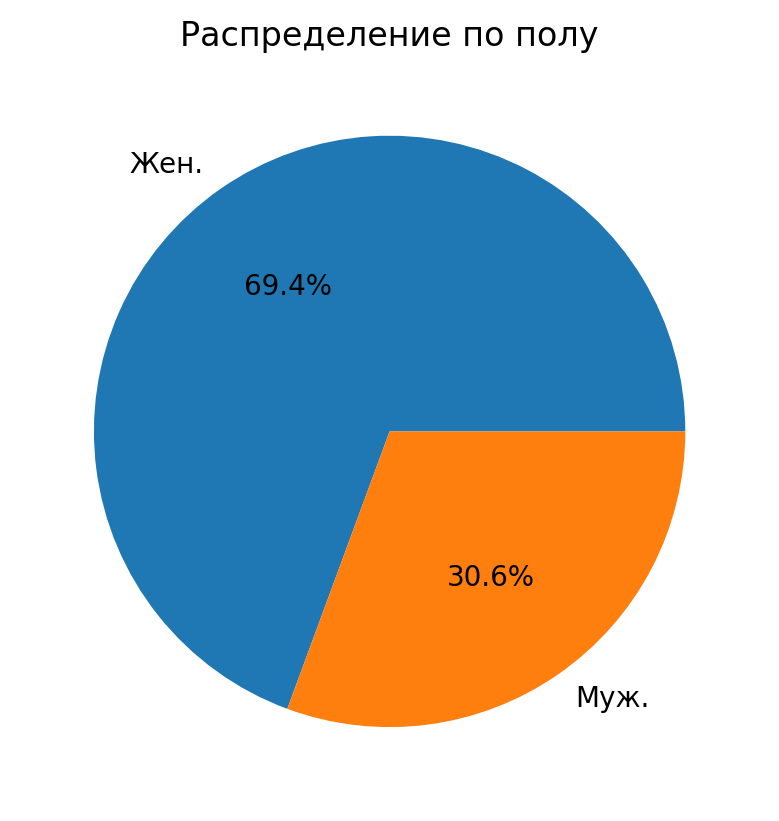

sex
Жен.    981
Муж.    433
Name: count, dtype: int64

In [33]:
# Общее распределение по полу.
plt.title('Распределение по полу')

labels = sorted(data_stuff['sex'].unique())


# create pie chart
plt.pie(data_stuff['sex'].sort_values().value_counts(sort=False),
        labels=labels,  autopct='%.1f%%')
# plt.savefig('SEX.png', dpi=200)
plt.show()

data_stuff['sex'].value_counts()

Большая часть специалистов - женского пола.

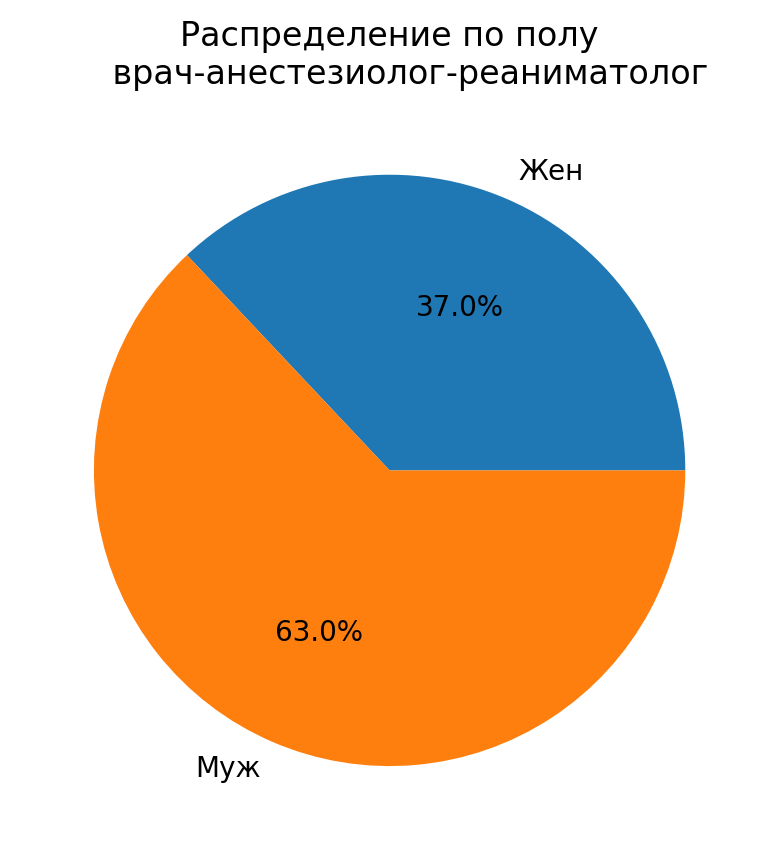

sex
Жен.     77
Муж.    131
Name: count, dtype: int64


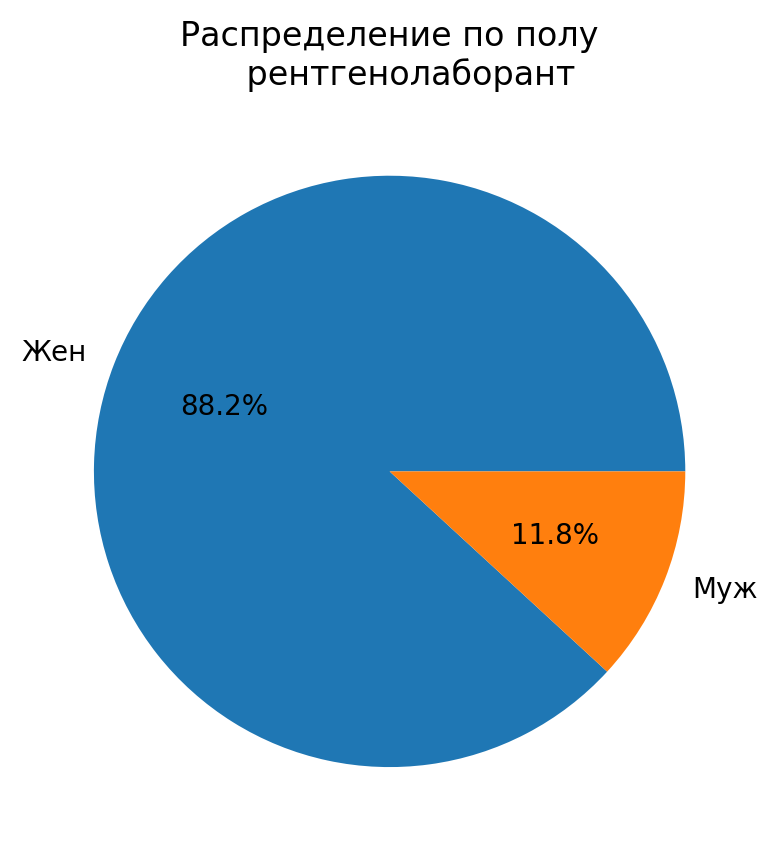

sex
Жен.    268
Муж.     36
Name: count, dtype: int64


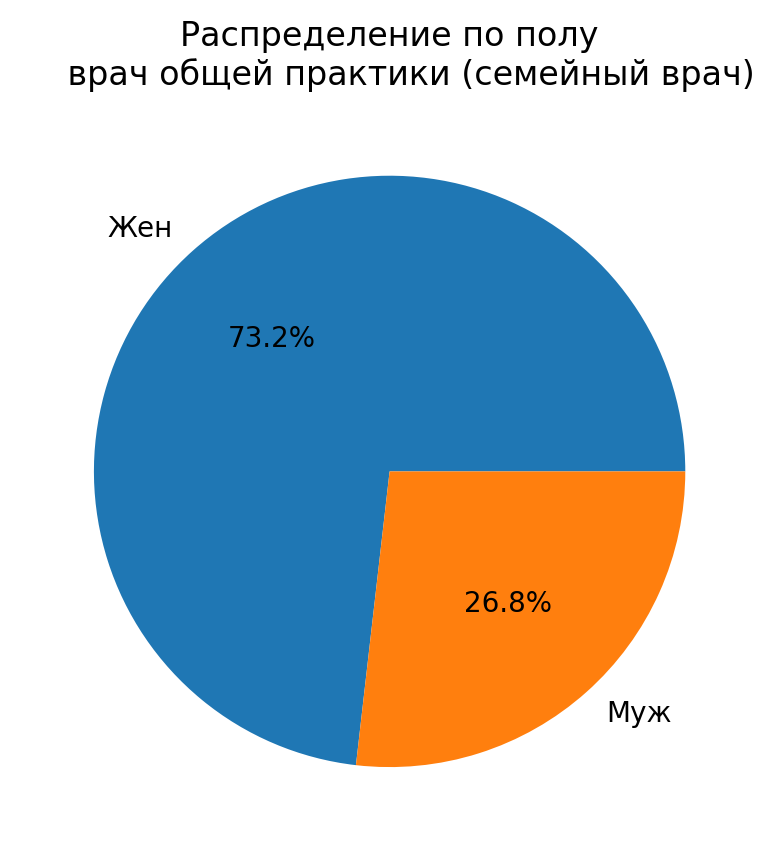

sex
Жен.    131
Муж.     48
Name: count, dtype: int64


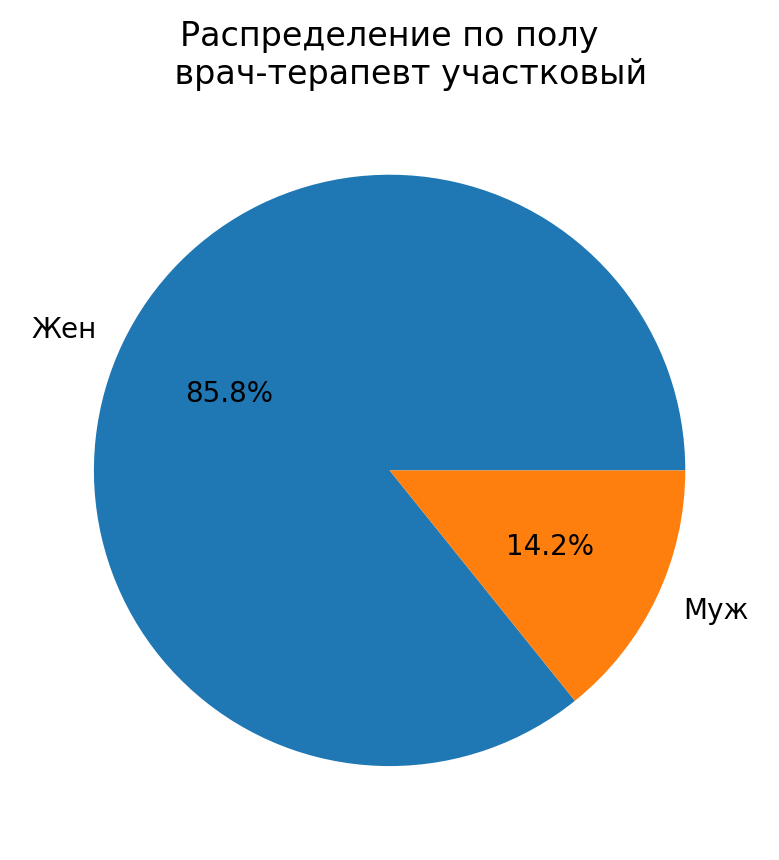

sex
Жен.    187
Муж.     31
Name: count, dtype: int64


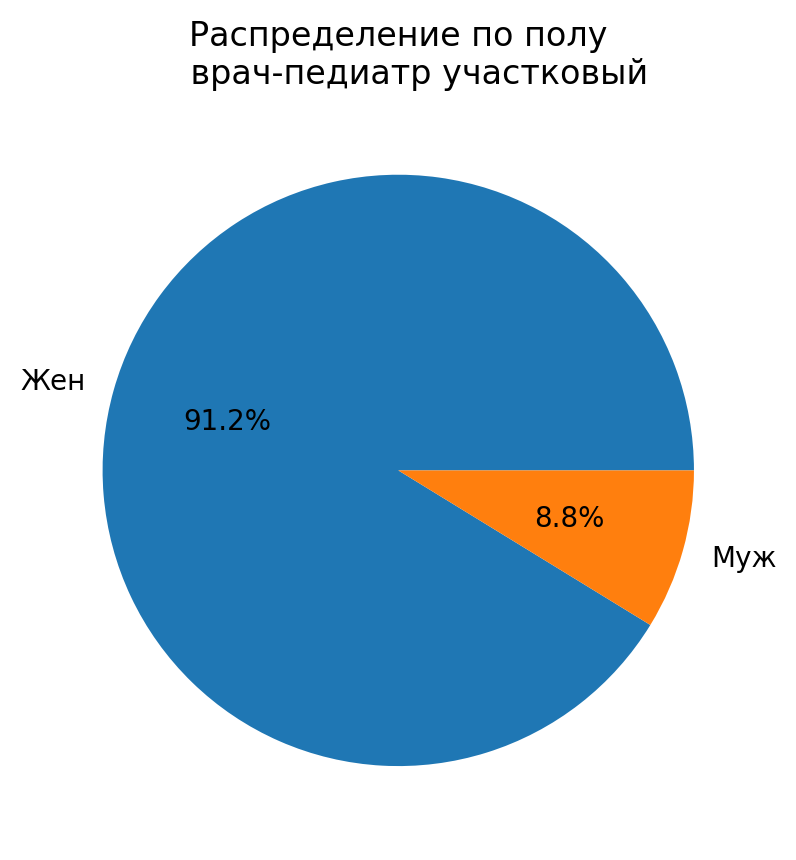

sex
Жен.    198
Муж.     19
Name: count, dtype: int64


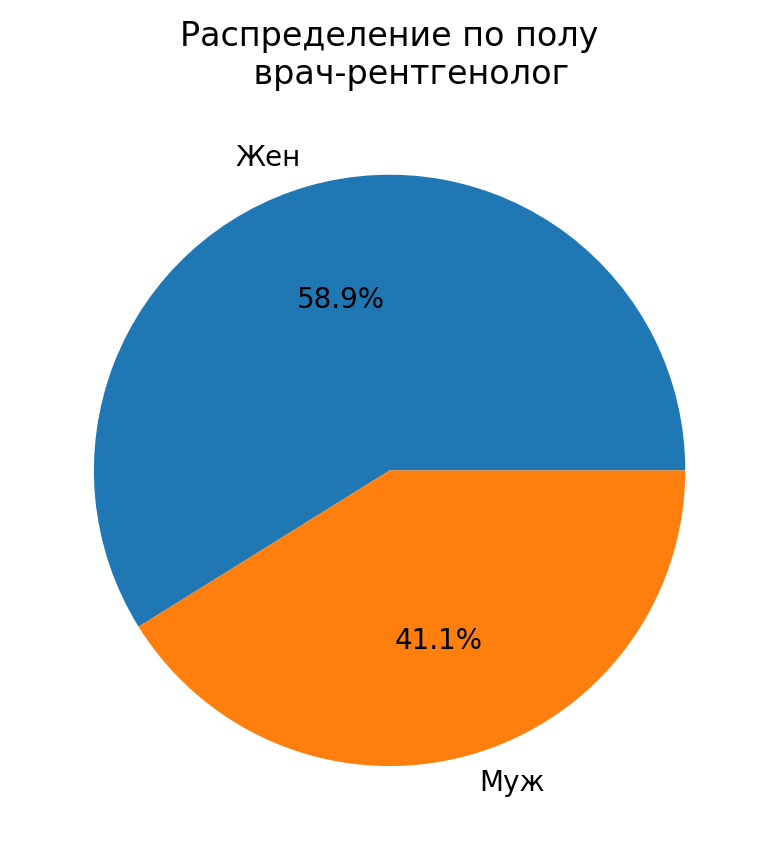

sex
Жен.    83
Муж.    58
Name: count, dtype: int64


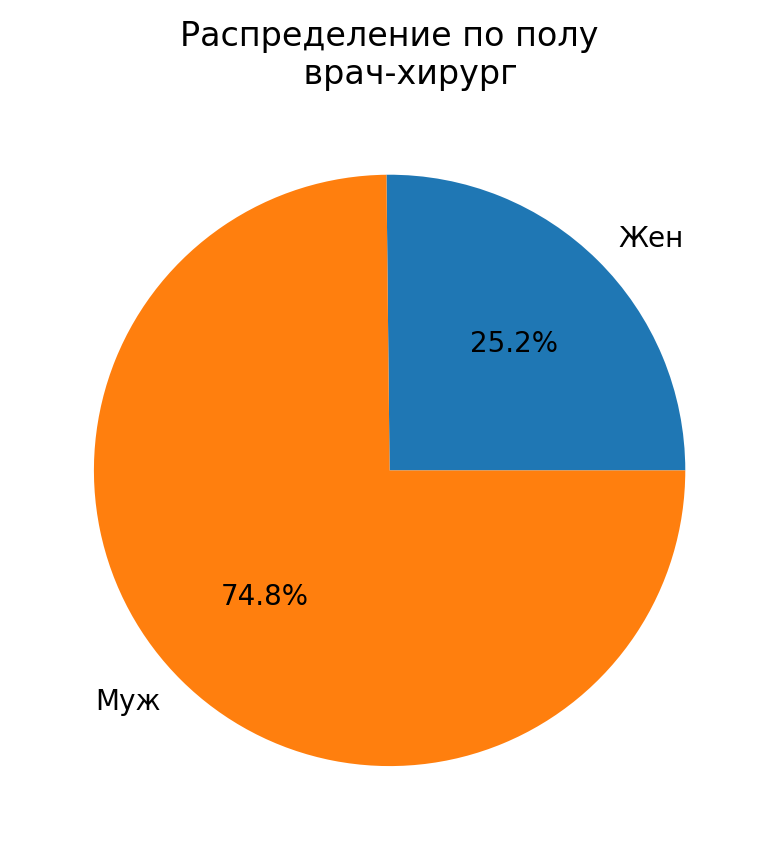

sex
Жен.     37
Муж.    110
Name: count, dtype: int64


In [34]:
# Теперь посмотрим распределение по полу в разных специальностях.

for prof in data_stuff['profession'].unique():
    df = data_stuff[data_stuff['profession']
                    == prof].sort_values(by='sex')['sex']

    plt.title(f'Распределение по полу\n\
    {prof}')

    labels = ['Жен', 'Муж']

    # create pie chart
    plt.pie(df.value_counts(sort=False), labels=labels,  autopct='%.1f%%')
    # plt.savefig('SEX.png', dpi=200)
    plt.show()

    print(df.value_counts(sort=False))

Как видно в большинстве специальностей преобладают женщины. Мужчины доминируют среди анестезиолгов и хирургов. На них приходится более половины мужчин от общего числа по всем специальностям.


**Посмотрим распределение по специальностям.**

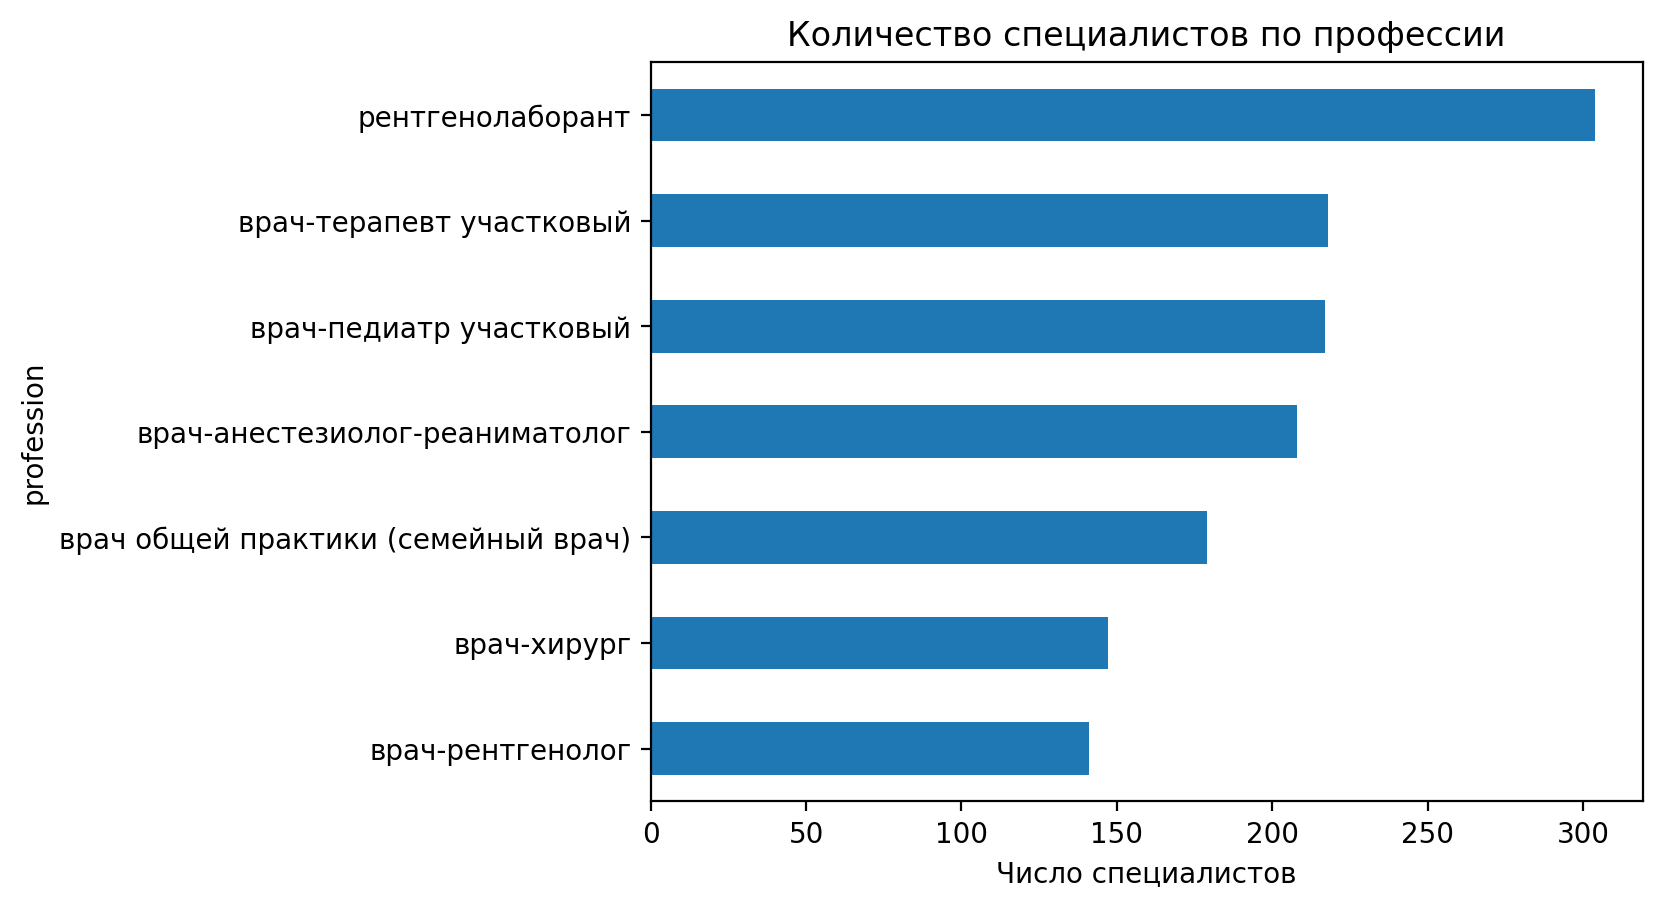

In [35]:
data_stuff['profession'].value_counts(ascending=True).plot(kind='barh')
plt.title('Количество специалистов по профессии')
plt.xlabel('Число специалистов')
plt.show()

Больше всего рентгенолаборантов, меньше всего врачей-рентгенологов. Врачай-анестезиологов-ренаиматлогов больше чем хирургов, так как они работают не только в операционных, но и в бригадах скорой помощи, отделениях реанимации.Возможно при увеличении числа хирургов, потребуется увеличение числа анестезиологов. 

**Распределение по возрасту**

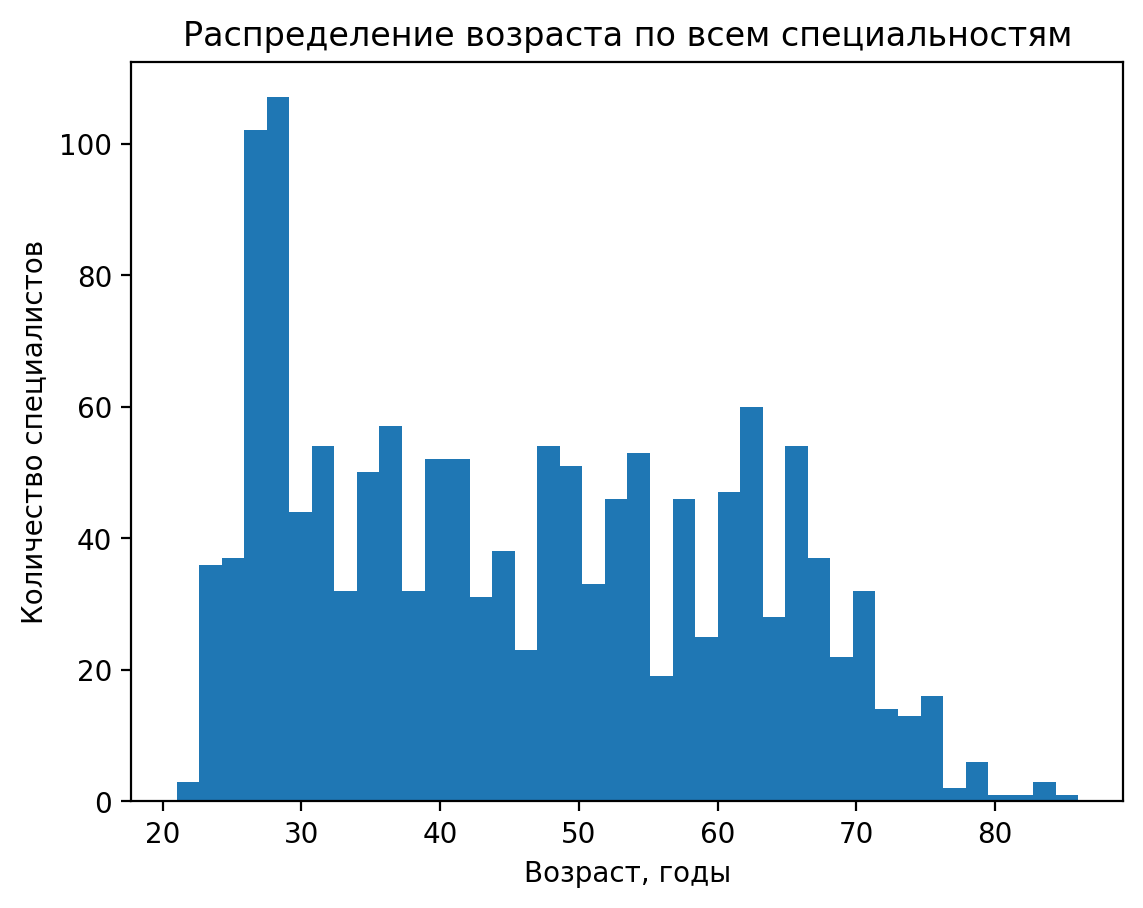

count    1414.000000
mean       45.773692
std        15.183743
min        21.000000
25%        31.000000
50%        44.000000
75%        59.000000
max        86.000000
Name: age, dtype: float64

In [36]:
# Здесь используем гистограмму.

plt.title('Распределение возраста по всем специальностям')

plt.hist(data_stuff['age'], bins=40)
plt.xlabel('Возраст, годы')
plt.ylabel('Количество специалистов')
plt.show()

data_stuff['age'].describe()

Стоит отметить, неравномерность распределения по возрасту. Мы видим большое количество специалистов младше 30 лет. Возможно, это ординаторы или недавно окончившие ординатуру специалисты по целевому направлению. Обращает на себя внимание "хвост" из специалистов старшей возрастной группы (70+), это группа риска оттока из специальности, как и молодые специалисты. Также требует дополнительного изучения группа от 31 года до 59 лет (25 и 75 персентили), так как это наиболее опытные и активные сотрудники в подразделениях МО.


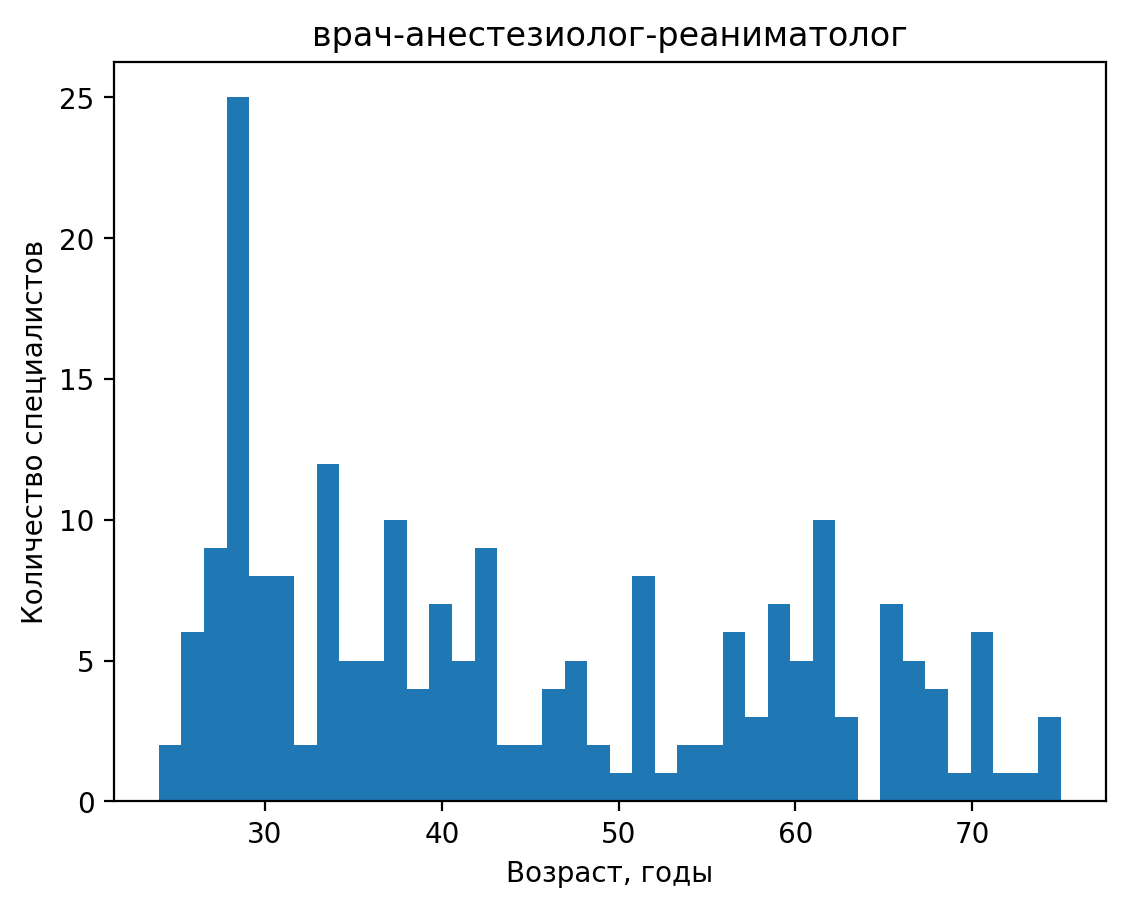

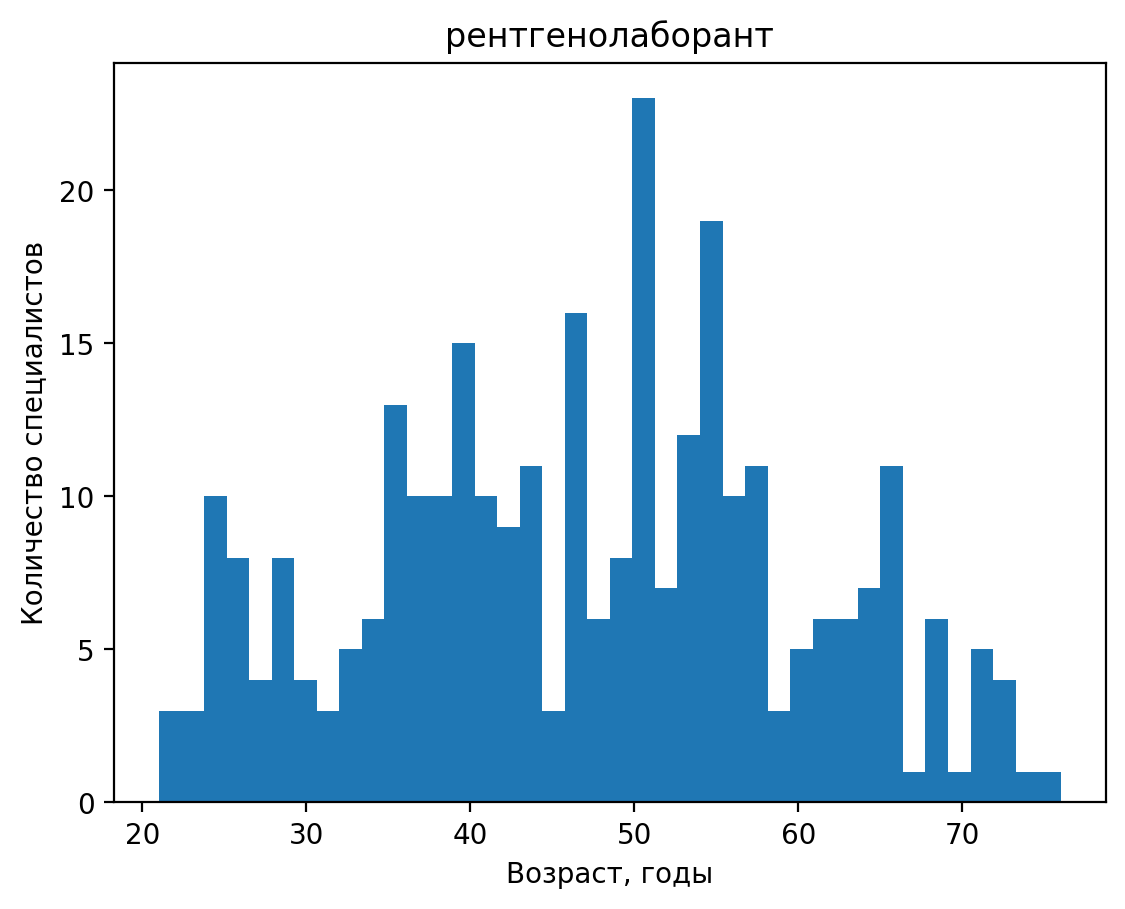

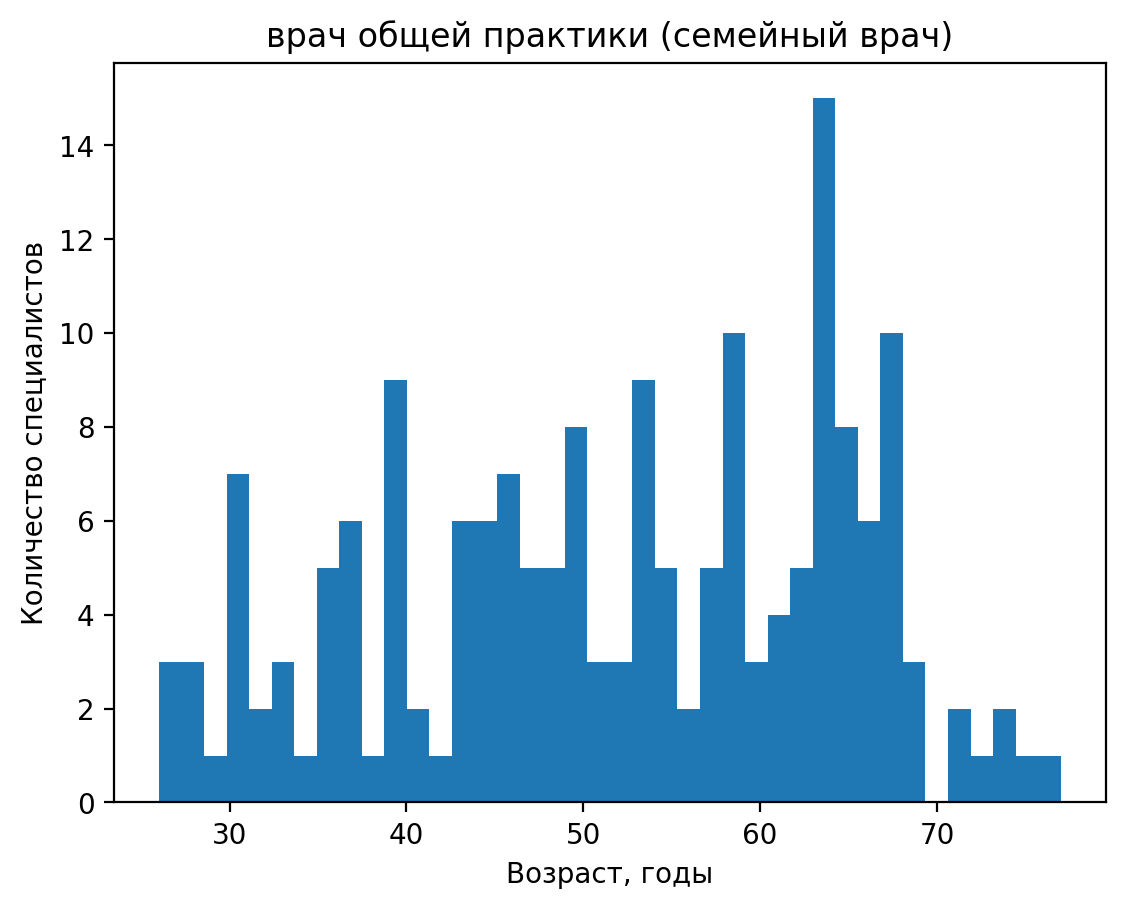

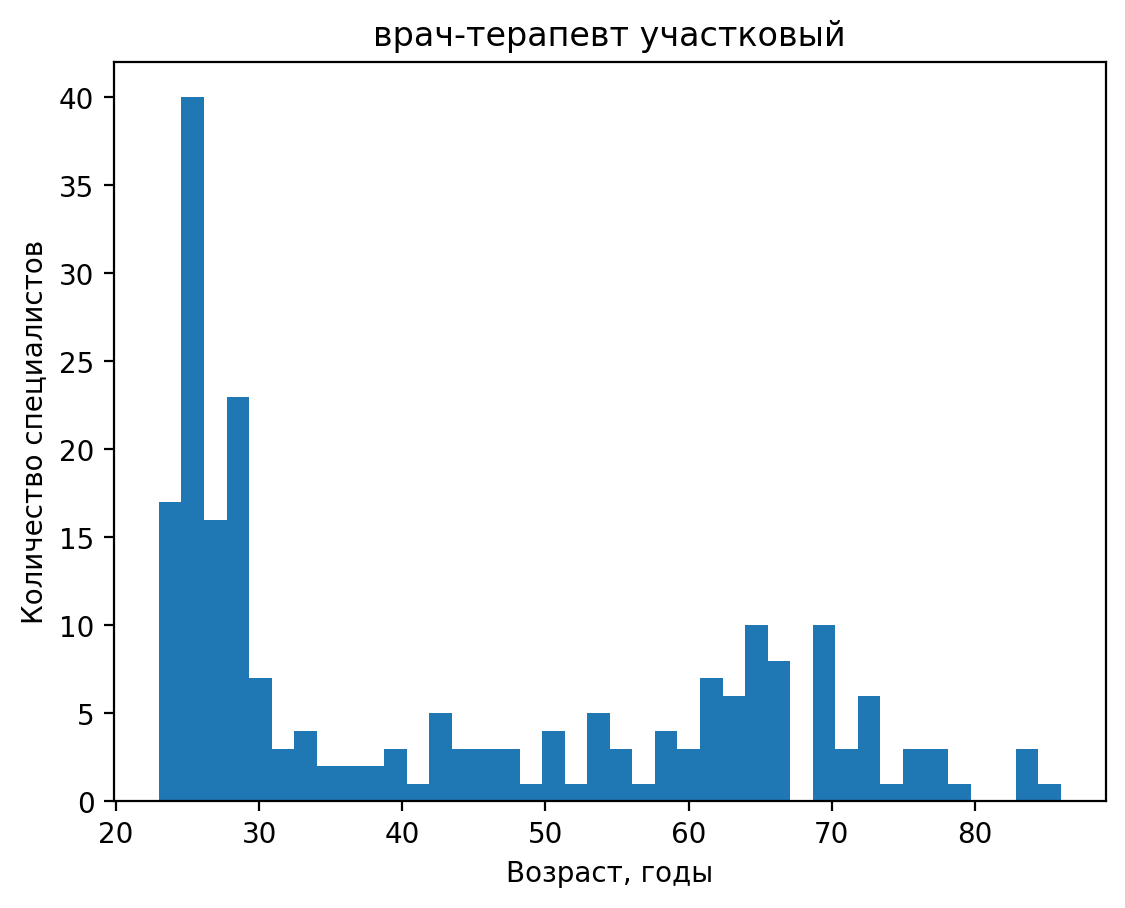

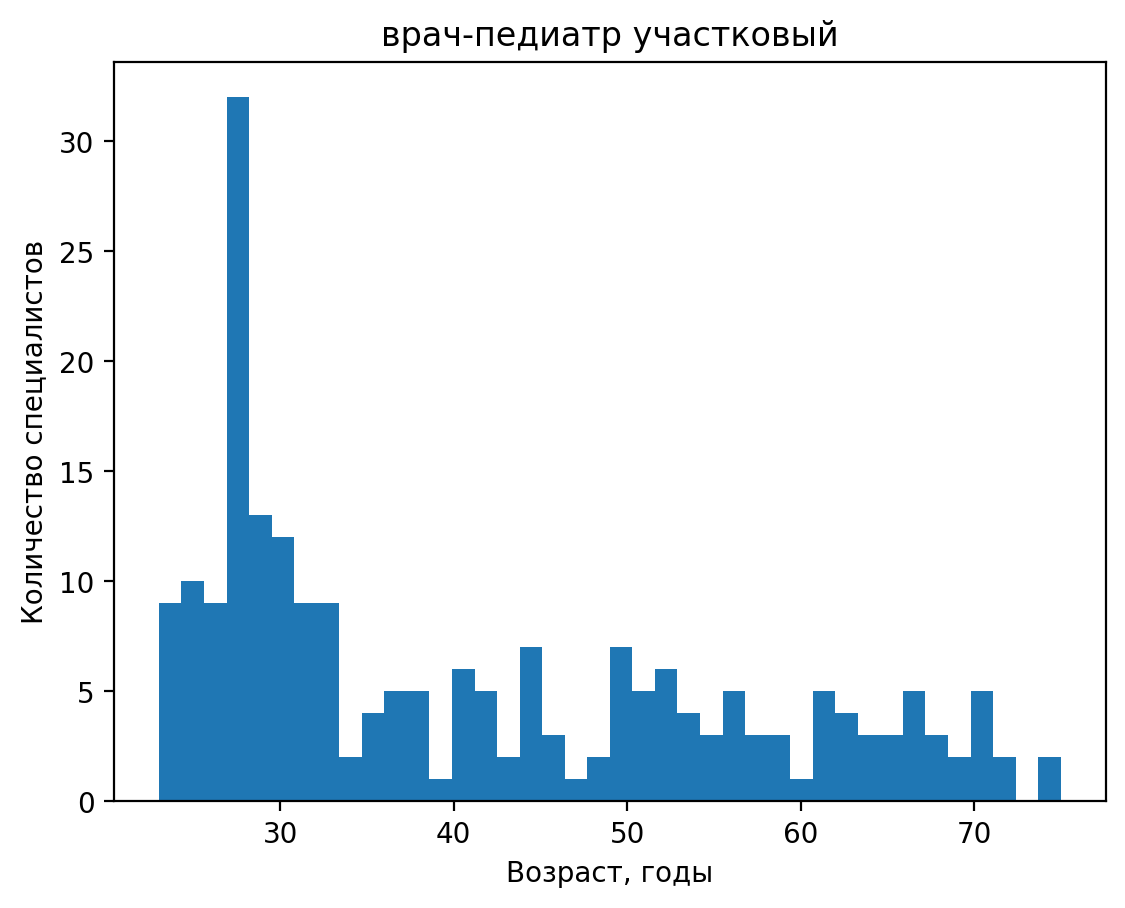

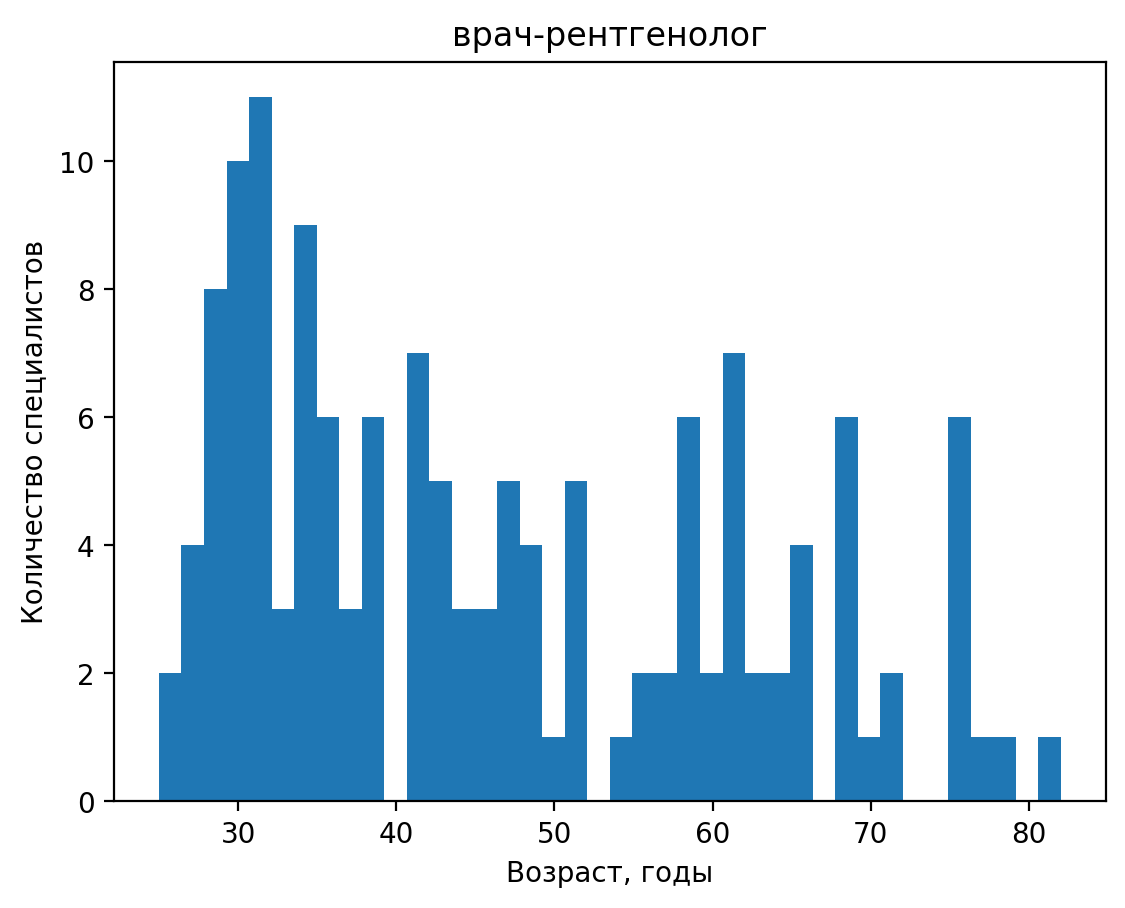

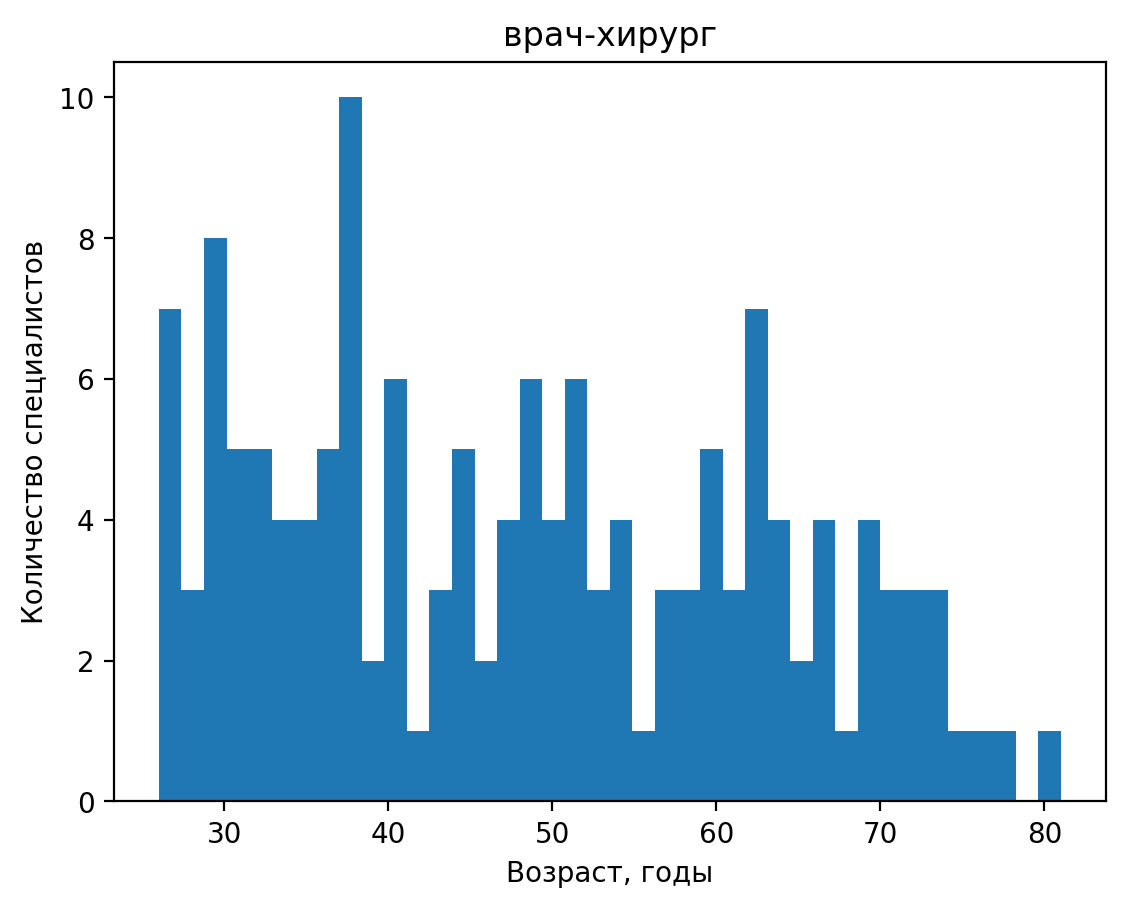

In [37]:
# Далее мы построим гистограммы распределения возраста по специальностям.

for prof in data_stuff['profession'].unique():
    plt.title(prof)
    plt.hist(data_stuff[data_stuff['profession']
             == prof]['age'], bins=40)
    plt.xlabel('Возраст, годы')
    plt.ylabel('Количество специалистов')
    plt.show()

Большую настороженность вызывает наличие перекоса в возрасте
среди участковых врачей и анестезиологов-реаниматлогов.

#### Выводы

- Большое количество женщин и девушек идет в специальность.
- Хирурги и анестезиологи представлены в основном мужчинами.
- Отмечается большое количество молодежи среди "участковых" специальностей.
- Есть сотрудники старше 70 лет.

### Возрастные группы

Разделим данные на возрастные группы: 60+, 30–50 и до 35 лет.

In [38]:
# Создание возрастных категорий
data_stuff['age_group'] = pd.cut(
    data_stuff['age'],
    bins=[0, 35, 50, 100],
    labels=['до 35 лет', '30-50 лет', '60+']
)


Теперь добавим столбец с данными о пенсионном возрасте.

In [39]:
data_stuff['senior'] = data_stuff['age_group'] == '60+'
data_stuff.head()

,dob,age,sex,organization,profession,age_group,senior
0,1958-01-01,66,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True
1,1968-11-13,55,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,рентгенолаборант,60+,True
2,1950-02-01,74,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),60+,True
3,1957-02-08,67,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True
4,1974-11-14,49,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),30-50 лет,False


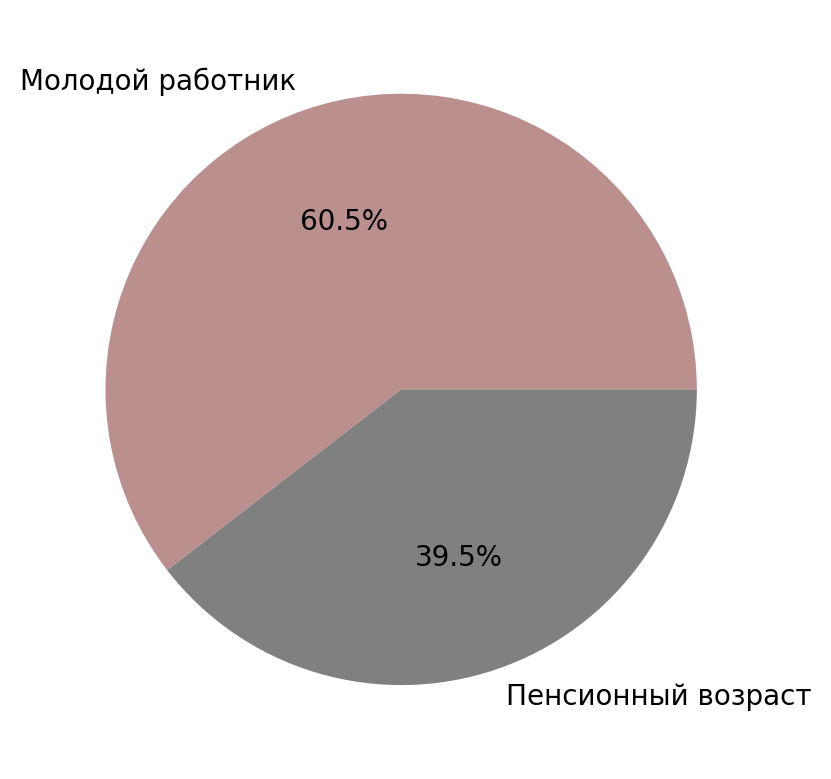

In [40]:
labels = 'Молодой работник', 'Пенсионный возраст'
sizes = data_stuff['senior'].sort_values().value_counts(sort=True)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=['rosybrown', 'gray'], autopct='%1.1f%%')
plt.show()

**Вывод:** в Тверской области работники пенсионного возраста составляют около 40%, таким образом отвергается предположение о том, что большинство медицинских работников в Тверской области пенсионного возраста.

In [41]:
# Группировка по полу и возрастным группам
gender_age_stats = data_stuff.groupby(['age_group', 'sex'], observed=False)['sex'].count().unstack()


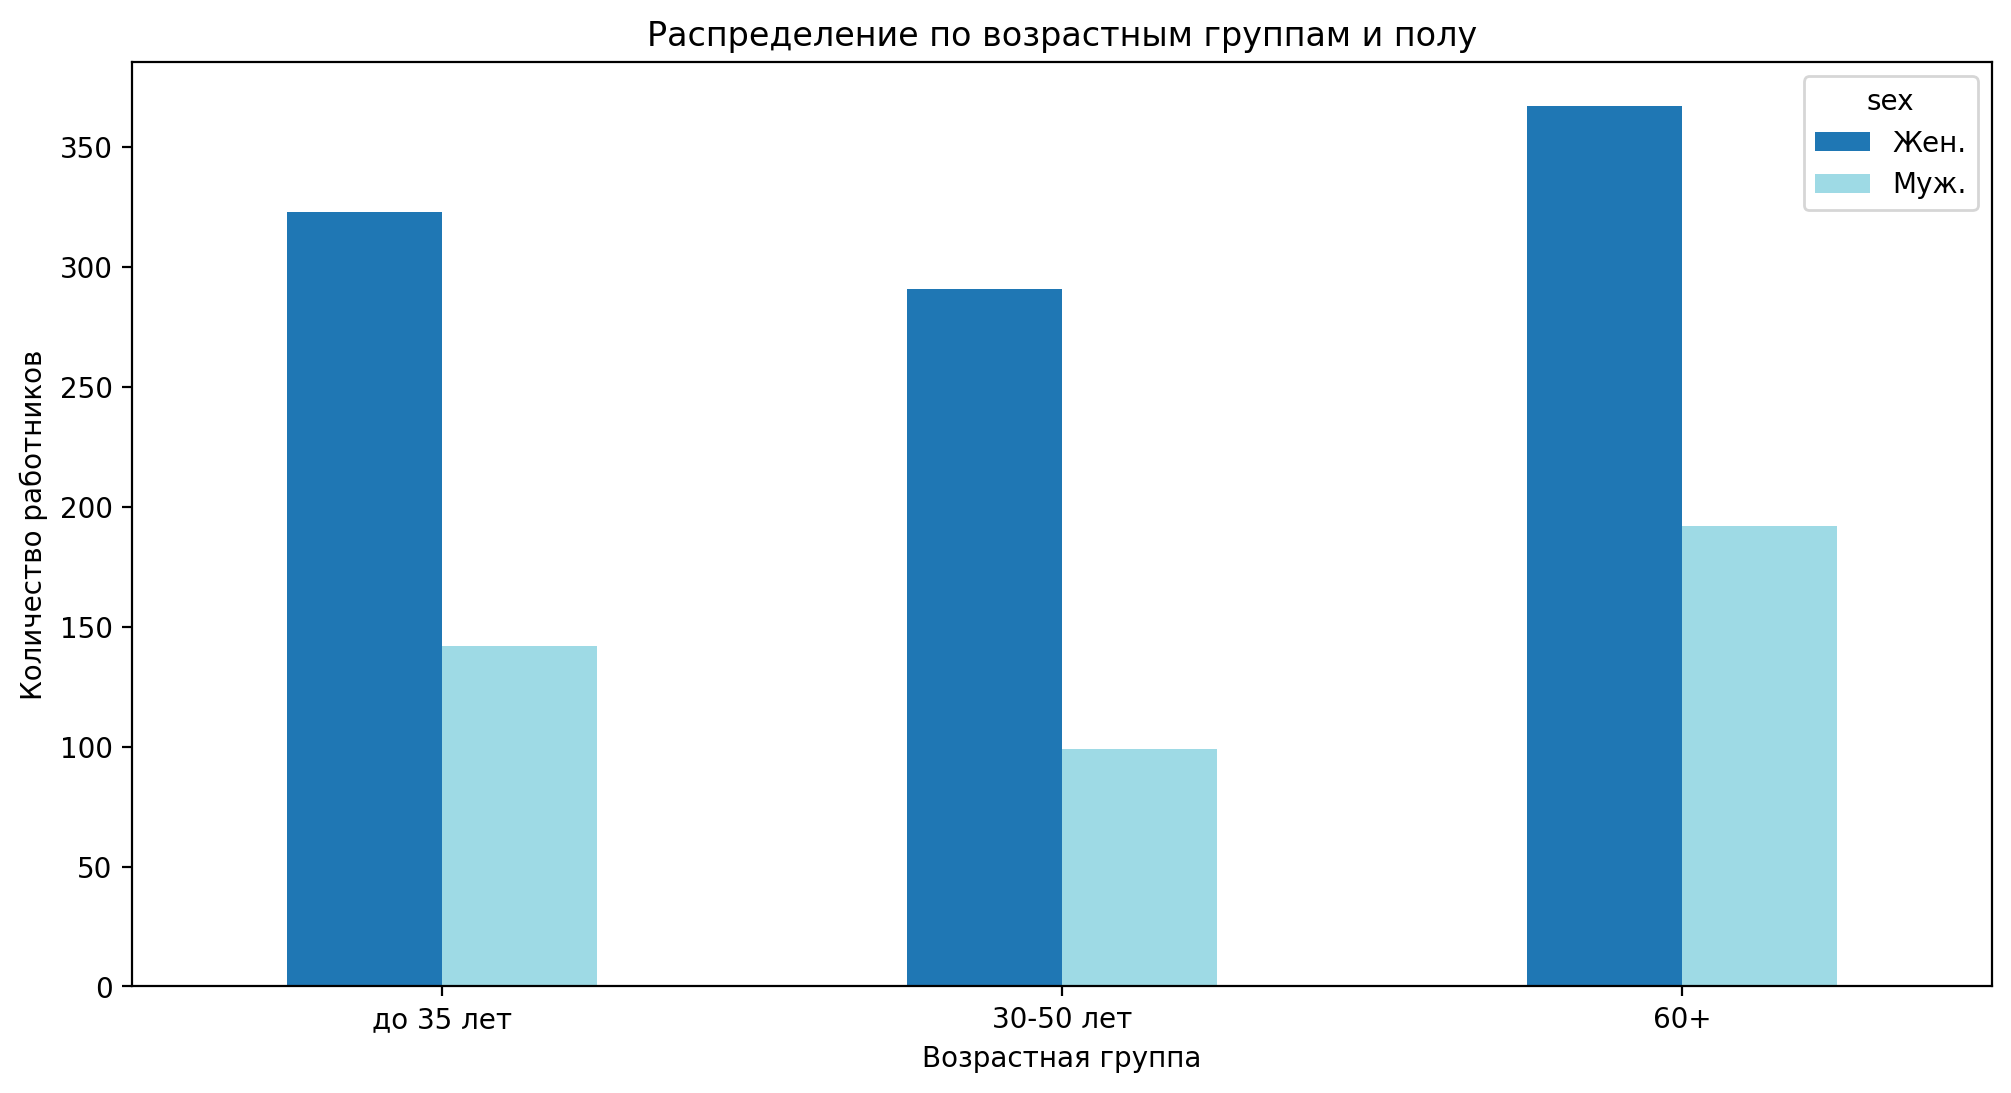

In [42]:
gender_age_stats.plot(
    kind='bar',  
    figsize=(12, 6), 
    grid=False, 
    colormap='tab20'
)
# Добавление заголовков и меток
plt.title('Распределение по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество работников')
plt.xticks(rotation=0)
plt.show()

**Вывод:** Во всех возрастных группах преобладают женщины, причем и женщин и мужчин пенсионного возраста больше, чем в других возрастных группах.

## Подготовка данных для Yandex DataLens

In [43]:
# Объединение таблиц
merged_data = pd.merge(data_stuff, data_coord, on='organization', how='inner')
merged_data.head()

,dob,age,sex,organization,profession,age_group,senior,abbr_organization,district,address,coordinates,district_normalized
0,1958-01-01,66,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True,ГБУЗ Окпнд г Тверь,городской округ город Тверь,"170005, г. Тверь, ул. Фурманова, д. 12","56.871230795727044, 35.895732720311834",Тверь
1,1968-11-13,55,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,рентгенолаборант,60+,True,"ГБУЗ ""СП №1""",городской округ город Тверь,"170001, г. Тверь, ул. Бакунина, 33","56.856056597699265, 35.87171508211874",Тверь
2,1950-02-01,74,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),60+,True,"ГБУЗ ""КЦРКБ""",городской округ город Тверь,"170032, Тверь, п. Химинститута, 59","56.796196770160655, 36.02370550191326",Тверь
3,1957-02-08,67,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True,ГБУЗ Окпнд г Тверь,городской округ город Тверь,"170005, г. Тверь, ул. Фурманова, д. 12","56.871230795727044, 35.895732720311834",Тверь
4,1974-11-14,49,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),30-50 лет,False,"ГБУЗ ""КБСМП""",городской округ город Тверь,"170024, г. Тверь, ул. М. Конева, 71","56.84410852162348, 35.83136175796528",Тверь


In [44]:
# Функция для первода координат в геоточки

def return_coord(row):
    row = str([float(i.strip()) for i in row.split(',')])
    return f"{row}"

In [45]:
merged_data['geopoint'] = merged_data['coordinates'].apply(return_coord)
merged_data.head()

,dob,age,sex,organization,profession,age_group,senior,abbr_organization,district,address,coordinates,district_normalized,geopoint
0,1958-01-01,66,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True,ГБУЗ Окпнд г Тверь,городской округ город Тверь,"170005, г. Тверь, ул. Фурманова, д. 12","56.871230795727044, 35.895732720311834",Тверь,"[56.871230795727044, 35.895732720311834]"
1,1968-11-13,55,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,рентгенолаборант,60+,True,"ГБУЗ ""СП №1""",городской округ город Тверь,"170001, г. Тверь, ул. Бакунина, 33","56.856056597699265, 35.87171508211874",Тверь,"[56.856056597699265, 35.87171508211874]"
2,1950-02-01,74,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),60+,True,"ГБУЗ ""КЦРКБ""",городской округ город Тверь,"170032, Тверь, п. Химинститута, 59","56.796196770160655, 36.02370550191326",Тверь,"[56.796196770160655, 36.02370550191326]"
3,1957-02-08,67,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог,60+,True,ГБУЗ Окпнд г Тверь,городской округ город Тверь,"170005, г. Тверь, ул. Фурманова, д. 12","56.871230795727044, 35.895732720311834",Тверь,"[56.871230795727044, 35.895732720311834]"
4,1974-11-14,49,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач),30-50 лет,False,"ГБУЗ ""КБСМП""",городской округ город Тверь,"170024, г. Тверь, ул. М. Конева, 71","56.84410852162348, 35.83136175796528",Тверь,"[56.84410852162348, 35.83136175796528]"


Теперь начнем категоризацию по удаленности от центра Твери.

Для этого нужно узнать, где находится центр Твери (56.8584, 35.9006) и вычислить расстояние от центра до МО.
Расстояние будем вычислять по координатам при помощи библиотеки haversine.

In [46]:
# Функция расчета расстояния от центра Твери до ЛПУ.
def haversin_func(row):
    dist = haversine((56.8584, 35.9006), (float(i) for i in row.split(',')), Unit.KILOMETERS)
    return round(dist)

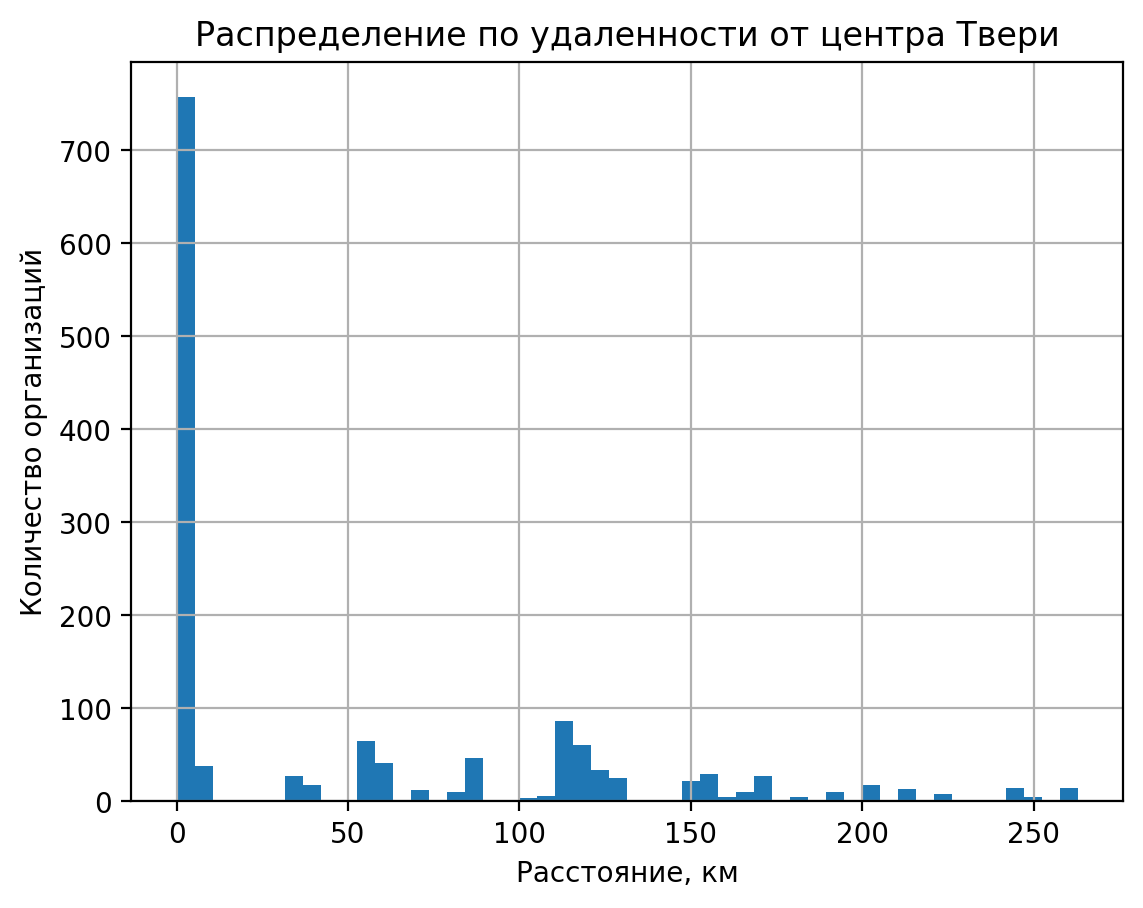

In [47]:
merged_data['distation'] = merged_data['coordinates'].apply(haversin_func)
merged_data['distation'].hist(bins = 50)
merged_data['distation'].describe()
# Добавление заголовков и меток
plt.title('Распределение по удаленности от центра Твери')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество организаций')
plt.xticks(rotation=0)
plt.show()

Теперь проведем категоризацию по расстоянию. Лучшим спосбом в данном случае будут фиксированные дистанции. Используем оператор cut(). Поделим на 5 зон.

In [48]:
# cut - делит на равные промежутки.
bin_labels_5 = ['Город', 'Пригород', 'Ближние', 'Дальние', 'Удаленные']
pd.cut(merged_data['distation'], bins = 5, labels=bin_labels_5).value_counts(sort = False)

distation
Город        840
Пригород     179
Ближние      264
Дальние       77
Удаленные     54
Name: count, dtype: int64

In [49]:
merged_data['type_MO_dist'] = pd.cut(merged_data['distation'], bins = 5, labels=bin_labels_5)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dob                  1414 non-null   datetime64[ns]
 1   age                  1414 non-null   int64         
 2   sex                  1414 non-null   object        
 3   organization         1414 non-null   object        
 4   profession           1414 non-null   object        
 5   age_group            1414 non-null   category      
 6   senior               1414 non-null   bool          
 7   abbr_organization    1414 non-null   object        
 8   district             1414 non-null   object        
 9   address              1414 non-null   object        
 10  coordinates          1414 non-null   object        
 11  district_normalized  1414 non-null   object        
 12  geopoint             1414 non-null   object        
 13  distation            1414 non-nul

In [50]:
merged_data['district_normalized'].unique()

array(['Тверь', 'Старицкий', 'Конаковский', 'Вышневолоцкий',
       'Удомельский', 'Кесовогорский', 'Максатихинский', 'Краснохолмский',
       'Ржев', 'Бологовский', 'Бежецкий', 'Кашинский', 'Осташковский',
       'Кимры', 'Нелидовский', 'Фировский', 'Торжок', 'Пеновский',
       'Зубцовский', 'Андреапольский', 'Бельский', 'Рамешковский',
       'Сандовский', 'Солнечный', 'Спировский', 'Торопецкий',
       'Жарковский', 'Кувшиновский', 'Оленинский', 'Селижаровский',
       'Сонковский', 'Лесной', 'Весьегонский', 'Лихославльский',
       'Калязинский', 'Западнодвинский', 'Молоковский', 'Озёрный'],
      dtype=object)

In [51]:
polygon = pd.read_csv('коорды_тверь.csv')
polygon 

,Polygon Coordinates,Municipal District Name
0,"[[[57.5811568, 34.62629], [57.5745189, 34.6264...",Вышний Волочек
1,"[[[56.8522914, 37.3122663], [56.8546006, 37.31...",Кимры
2,"[[[56.2371255, 34.3960583], [56.2372517, 34.39...",Ржев
3,"[[[57.0041069, 34.9979349], [57.0043195, 34.99...",Торжок
4,"[[[56.9360617, 35.9011321], [56.9312118, 35.90...",Тверь
5,"[[[56.8954003, 36.0649584], [56.8942961, 36.05...",Тверь
6,"[[[56.9432243, 31.0696978], [56.9390503, 31.07...",Торопецкий
7,"[[[56.7096089, 34.5113485], [56.7117442, 34.50...",Торжокский
8,"[[[56.3066142, 34.8640628], [56.3012192, 34.86...",Старицкий
9,"[[[57.6332294, 35.5753967], [57.6331262, 35.57...",Спировский


In [52]:
polygon['Polygon Coordinates'][polygon['Municipal District Name'] == 'Тверь']

4    [[[56.9360617, 35.9011321], [56.9312118, 35.90...
5    [[[56.8954003, 36.0649584], [56.8942961, 36.05...
Name: Polygon Coordinates, dtype: object

In [53]:
polygon.rename(columns={'Polygon Coordinates': 'polygon',
                       'Municipal District Name': 'district_normalized'}, inplace=True)
polygon_unique = polygon.drop_duplicates(subset=['district_normalized'])


In [54]:
# Объединение таблиц по нормализованным названиям
final_data = pd.merge(
    merged_data,
    polygon,
    on='district_normalized',
    how='left'  
)


In [55]:
# Для подготовки данных скопируем их в новый датасет.

df_for_xlsx = final_data.copy()

In [56]:
df_for_xlsx.to_excel('for_datalens.xlsx', index=False)

In [57]:
df_for_xlsx.to_csv('for_datalens.csv', index=False)

In [58]:
merged_data.to_csv('merged_data.csv', index=False)

###  Итоговые выводы

- Подготовлены данные для загрузки в Yandex DataLens.
- Дальнейшая работа проводится в Yandex DataLens с полученным файлом.

Дашборд находится по ссылке <https://datalens.yandex/rli2k7acs68ad>

## Вывод и рекомендации для Тверского ГМУ
Ответы на вопросы согласно дашборду:

Наибольший «кадровый голод» первичного звена ощущается в отдаленных районах. В городе и пригороде работают большинство.

Самый молодой коллектив находится в Лихославльском районе (средний возраст 41 год), самый пожилой - в Жарковском (средний возраст 65 лет).

Отвергается предположение о том, что большинство медицинских работников в Тверской области пенсионного возраста, их доля составляет 32%

Во всех возрастных группах женщины преобладают

Количество мужчин больше, чем женщин среди врачей - хирургов и врачей - анестезиологов - ревматологов.

116 выпускников Университета (24-27 лет) устроились работать в этом году в систему оказания первичной врачебной медико-санитарной помощи г. Твери и Тверской области. При этом, в городе Твери выпускников Университета устроилось работать больше (72 человека), чем в области (44 человека).


На основе анализа можно дать следующие **рекомендации для Тверского ГМУ:**

1. Стимулирование молодых специалистов работать в отдаленных районах

Проблема: Врачей не хватает именно в отдаленных районах, а молодые специалисты предпочитают оставаться в городе.

Рекомендации:

- Разработать специальные программы поддержки для выпускников, готовых работать в районах (повышенные стипендии, выплаты, предоставление жилья).
- Внедрить обязательную практику/стажировку в районных медучреждениях для студентов старших курсов.
- Разработать партнёрские программы с МО, чтобы привлекать студентов заранее, например, через целевое обучение или гарантию трудоустройства.

2. Развитие карьерных перспектив и условий труда

Проблема: Молодые врачи не задерживаются в области из-за нехватки карьерных возможностей и условий работы.

Рекомендации:

- Внедрить менторские программы, где опытные врачи помогают адаптироваться молодым специалистам.
- Создать гибридные форматы работы (например, совмещение очного и телемедицинского приёма, особенно в отдалённых районах).
- Развивать онлайн-образование и сертификацию, чтобы специалисты могли повышать квалификацию без отрыва от работы.

3. Увеличение набора студентов по востребованным специальностям

Проблема: Нехватка специалистов в узких областях, например, хирургов и анестезиологов.

Рекомендации:

- Разработать гранты и целевые места для студентов, которые выберут дефицитные направления.
- Усилить профориентацию на старших курсах, рассказывая о преимуществах работы в востребованных областях.
- Создать стимулы для переквалификации уже работающих врачей в более востребованные направления.

4. Поддержка врачей старшего возраста

Проблема: Врачей пенсионного возраста 32%, но они продолжают работать.

Рекомендации:

- Внедрить гибкий график работы и возможность частичной занятости для пожилых врачей.
- Развивать формат наставничества, чтобы опытные специалисты передавали знания молодым врачам.

Эти меры помогут уменьшить кадровый голод, повысить престиж работы в области и сделать работу врачей комфортнее.